In [1]:
import numpy as np
import matplotlib.pyplot as plt

from plot_func import *

np.random.seed(42)

In [2]:
# Caculate the first and second variation of a Brownian motion
def variation(X, order):
    if order == 1:
        return np.cumsum(np.abs(np.diff(X)))
    elif order == 2:
        return np.cumsum((np.diff(X))**2)
    else:
        raise ValueError('Order must be 1 or 2')

# Caculate the mixed variation of X and S
def mixed_variation(X, S):
    return np.cumsum(np.diff(X)*np.diff(S))

# Simulate X and S
def simulate(params, X0, S0, dt, num_steps):
    
    # Unpack the parameters
    alpha = params['alpha']
    v = params['v']
    theta = params['theta']
    sigma = params['sigma']
    sigma1 = params['sigma1']
    sigma2 = params['sigma2']
    
    # Initialize the arrays
    X = np.zeros(num_steps)
    S = np.zeros(num_steps)
    X[0] = X0
    S[0] = S0

    # Simulate the process
    dBt = np.sqrt(dt) * np.random.normal(0, 1, num_steps)
    dWt = np.sqrt(dt) * np.random.normal(0, 1, num_steps)
    for i in range(1, num_steps):   
        X[i] = X[i-1] + alpha * (v - X[i-1]) * dt + sigma * dBt[i-1]
        S[i] = S[i-1] + theta * (X[i-1] - S[i-1]) * dt + sigma1 * dBt[i-1] + sigma2 * dWt[i-1]
        
    return X, S

## Task 1:
1. Generate **FIVE** orbits of Brownian motion
   
2. Plot the first and second order variances of the **FIRST** orbit

In [3]:
# Parameters
num_trajectories = 5
num_steps = 1000
step_size = 0.1
t = np.arange(num_steps) * step_size

# Generate Brownian motions
brownian_motions = []
for _ in range(num_trajectories):
    brownian_motion = np.cumsum(np.random.normal(0, np.sqrt(step_size), num_steps))
    brownian_motions.append(brownian_motion)
    
# calculate the first and second variation of the first trajectory
variations = []
for i in range(2):
    variations.append(variation(brownian_motions[0], order=i+1))

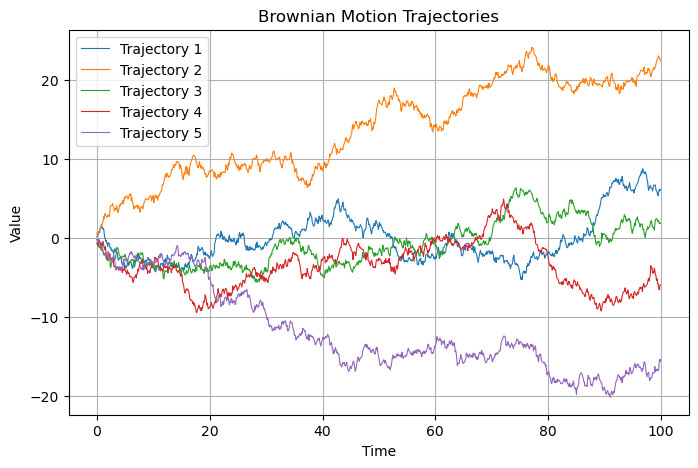

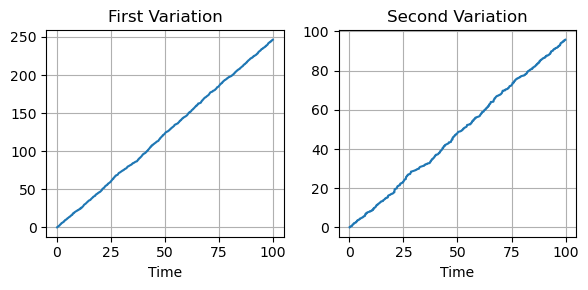

In [4]:
# Plot the trajectories
plot_trajectories(t, brownian_motions, save=False)
# Plot the first and second variation
plot_variation(t, variations, save=False)

## Task 2:

Set $ B_{\mathbb{T}} = \{ B_t : t \geq 0 \}  $ 与 $W_{\mathbb{T}} = \{ W_t : t \geq 0 \} $ are standard Brownian motions. 

$(X_t, S_t)$ are solution of the following stochastic differential equation (SDE):

\begin{align}
    \left\{
    \begin{aligned}
        \mathrm{\,d} X_t &= \alpha (v - X_t) \mathrm{\,d} t + \sigma \mathrm{\,d} B_t \\
        \mathrm{\,d} S_t &= \theta (X_t - S_t) \mathrm{\,d} t + \hat{\sigma_1} \mathrm{\,d} B_t + \hat{\sigma_2} \mathrm{\,d} W_t \\
        X_0 &= x_0,\, S_0 = s_0
    \end{aligned}
    \right.
    \nonumber
\end{align}

where $\alpha, v, \sigma, \theta, \sigma_1, \sigma_2, x_0, s_0$ are constants.

Given different paramerters,

1. Generate multiple orbits of $X$ and plot the second-order variance
   
2. Generate multiple orbits of $(X,\, S)$ and plot the mixed second-order variance

In [5]:
# Parameters
dt = 0.1
num_steps = 1000
t = np.arange(num_steps) * dt

X0 = 2.5
S0 = 3.5

params_1 = {'alpha': 0.15, 'v': 3, 'theta': 0.15, 'sigma': 0.1, 'sigma1': 0.05, 'sigma2': 0.1,}
params_2 = {'alpha': 0.25, 'v': 3, 'theta': 0.25, 'sigma': 0.2, 'sigma1': 0.15, 'sigma2': 0.1,}
params_3 = {'alpha': 0.5, 'v': 3, 'theta': 0.5, 'sigma': 0.3, 'sigma1': 0.2, 'sigma2': 0.1,}
params = [params_1, params_2, params_3]

v = [3, 3, 3] # Long-term mean of X

In [6]:
# Simulate the processes
Xs = []
Ss = []
for param in params:
    X, S = simulate(param, X0, S0, dt, num_steps)
    Xs.append(X)
    Ss.append(S)

# 2nd variation of X
X_variations = []
for X in Xs:
    X_variations.append(variation(X, order=2))

# mixed variation of X and S
mixed_variations = []
for X, S in zip(Xs, Ss):
    mixed_variations.append(mixed_variation(X, S))

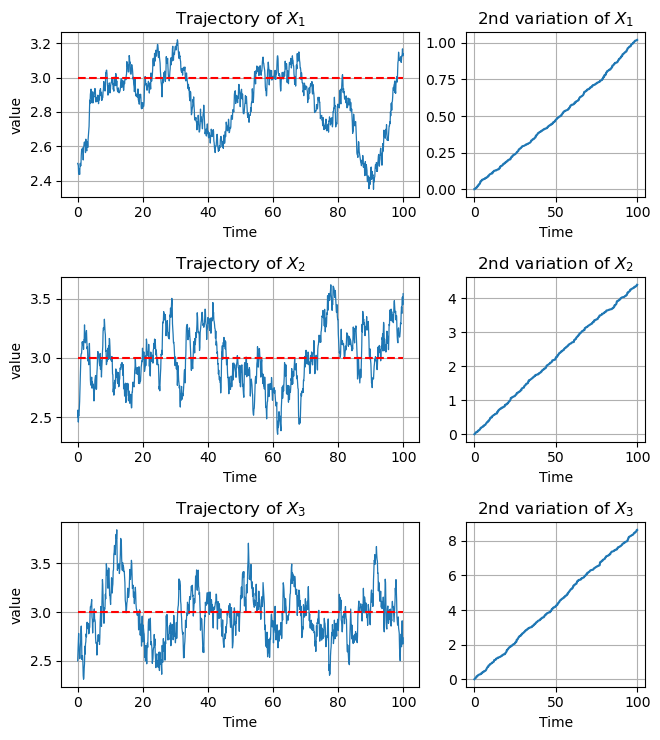

In [7]:
plot_X(t, Xs, X_variations, v, save=False)

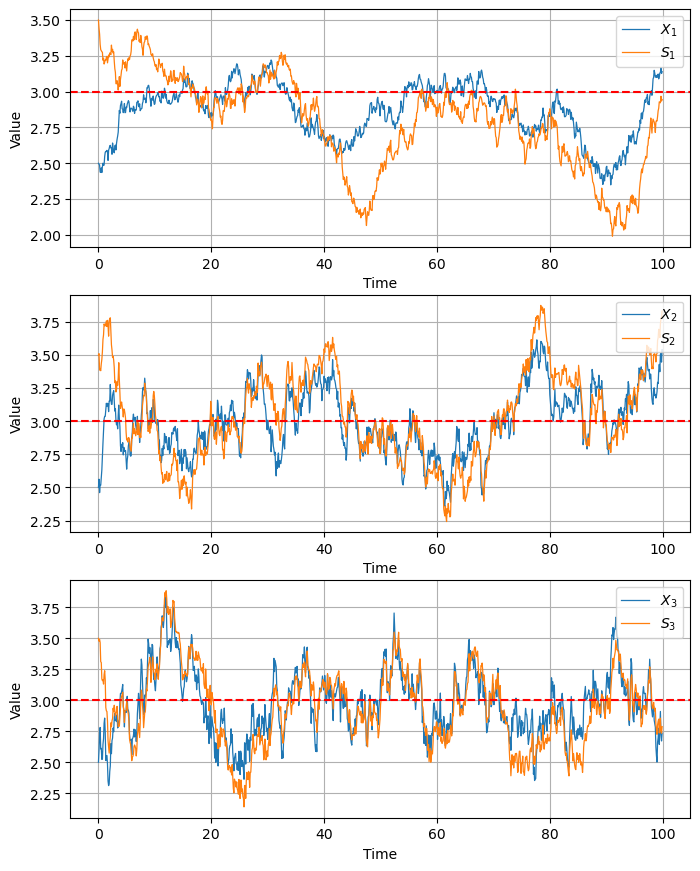

In [8]:
plot_XandS(t, Xs, Ss, v, save=False)

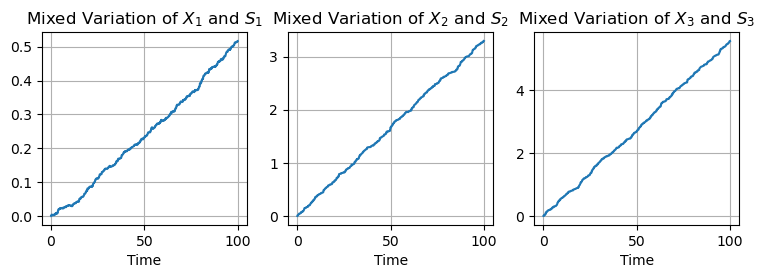

In [9]:
plot_mixed_variation(t, mixed_variations, save=False)